## Jahresbestleistungen pro Ort

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_full = pd.read_csv('data/2023.csv')
data_full["name"] = data_full["firstname"] + " " + data_full["lastname"]
data_full['date'] = pd.to_datetime(data_full['date'], format='%d.%m.%Y')
data = data_full.drop_duplicates(subset=['ageGroup', 'club', 'discipline', 'result', 'teamResult', 'place', 'location', 'date'])


In [2]:
top_locations = data['location'].value_counts().head(10).reset_index()
top_locations = top_locations.rename(columns={'count': 'Jahresbestleistungen', 'location': 'Ort'})
top_locations.index += 1
display(top_locations)

,Ort,Jahresbestleistungen
1,Püttlingen,1505
2,Saarlouis,596
3,Saarbrücken,535
4,Rehlingen,375
5,St. Wendel,275
6,Friedrichsthal,240
7,Dillingen,170
8,Ottweiler,167
9,Lebach,149
10,Überherrn,133


## Jahresbestleistungen pro Tag

,Datum,Jahresbestleistungen
0,2023-07-16,658
1,2023-06-08,401
2,2023-07-01,347
3,2023-06-04,220
4,2023-09-24,199
5,2023-09-16,173
6,2023-06-03,162
7,2023-06-23,149
8,2023-04-29,140
9,2023-07-02,118


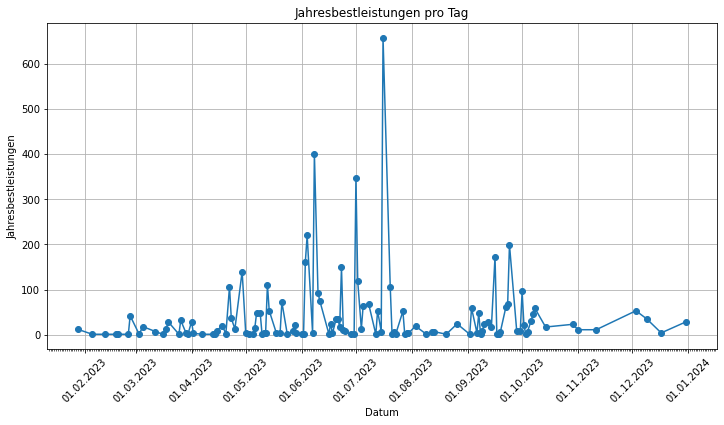

In [3]:
import matplotlib.dates as mdates

date_counts = data['date'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_counts.index, date_counts.values, marker='o')
ax.set_xlabel('Datum')
ax.set_ylabel('Jahresbestleistungen')
ax.set_title('Jahresbestleistungen pro Tag')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))


plt.grid()

top_10_dates = data['date'].value_counts().head(10).reset_index()
top_10_dates.columns = ['Datum', 'Jahresbestleistungen']
display(top_10_dates)

In [4]:
club_entry_counts = data['club'].value_counts()
club_entry_counts = club_entry_counts.rename_axis('Verein').reset_index(name='Jahresbestleistungen')
club_entry_counts.index += 1
display(club_entry_counts.head(10))

,Verein,Jahresbestleistungen
1,LC Rehlingen,802
2,LA Team Saar,789
3,LSG Sbr.-Sulzbachtal,424
4,LG Saar 70,360
5,SV GO! Saar 05,335
6,LG Berus,185
7,LAC Saarlouis,170
8,ATSV Saarbrücken,161
9,LV Merzig,157
10,TV St. Wendel,118


## Athleten pro Verein

In [5]:
athletes_per_club = data_full.groupby('club')['athleteId'].nunique()
athletes_per_club = athletes_per_club.reset_index()
athletes_per_club.columns = ['Verein', 'Athleten']
athletes_per_club = athletes_per_club.sort_values(by='Athleten', ascending=False)

entries_per_club = data.groupby('club').size().reset_index(name='Number of Entries')
entries_per_club = entries_per_club.sort_values(by='Number of Entries', ascending=False)

combined_data = pd.merge(athletes_per_club, entries_per_club, left_on='Verein', right_on='club', how='outer')
combined_data.drop(columns='club', inplace=True)
combined_data.columns = ['Verein', 'Athleten', 'Nennungen']
combined_data = combined_data.sort_values(by='Athleten', ascending=False)
combined_data.reset_index(drop=True, inplace=True)
combined_data.index += 1
combined_data['Verhältnis Nennungen/Athleten'] = round(combined_data['Nennungen'] / combined_data['Athleten'], 2)

display(combined_data.head(20))

,Verein,Athleten,Nennungen,Verhältnis Nennungen/Athleten
1,LC Rehlingen,181,802,4.43
2,LA Team Saar,139,789,5.68
3,LSG Sbr.-Sulzbachtal,104,424,4.08
4,LG Saar 70,87,360,4.14
5,SV GO! Saar 05,83,335,4.04
6,LLG Wustweiler,62,111,1.79
7,ATSV Saarbrücken,37,161,4.35
8,LAG Saarbrücken,35,80,2.29
9,LAC Saarlouis,33,170,5.15
10,LV Merzig,32,157,4.91


## Älteste Athleten

In [6]:
oldest_entries = data[data['birthyear'] != 0]
oldest_entries = oldest_entries.groupby(['name', 'birthyear', 'club', 'ageGroup']).size().reset_index(name='count')
oldest_entries = oldest_entries.sort_values(by='birthyear', ascending=True)
oldest_entries.columns = ['Name', 'Geburtsjahr', 'Verein', 'Altersklasse', 'Nennungen']
oldest_entries.reset_index(drop=True, inplace=True)
oldest_entries.index += 1
display(oldest_entries.head(20))

,Name,Geburtsjahr,Verein,Altersklasse,Nennungen
1,Gerhard Adams,1937,LC Rehlingen,M,4
2,A. Buchholz,1939,StG GO! Saar Express,M,1
3,Horst Backes,1939,SV GO! Saar 05,M,1
4,Hanne Bleymehl,1940,SC Friedrichsthal,F,2
5,Werner Mootz,1942,LTF Köllertal,M,2
6,Rudi Nieder,1943,TV 1886 Bexbach,M,2
7,Norbert Klees,1946,LSG Sbr.-Sulzbachtal,M,1
8,Reinhold Schuh,1948,LLG Wustweiler,M,1
9,Ute Schweitzer,1948,SV GO! Saar 05,F,4
10,Margot Junk,1948,SC Friedrichsthal,F,1


## Athleten pro Jahrgang

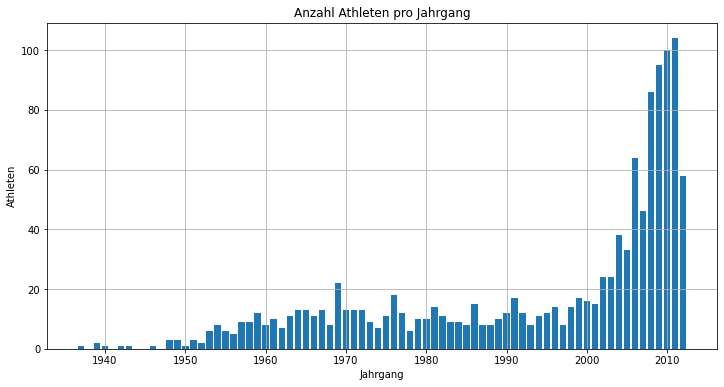

,Jahrgang,Athleten
1,2012,58
2,2011,104
3,2010,100
4,2009,95
5,2008,86
6,2007,46
7,2006,64
8,2005,33
9,2004,38
10,2003,24


In [7]:
## amount of athletes per birthyear
birthyear_counts = data[data['birthyear'] != 0]
birthyear_counts = birthyear_counts.drop_duplicates(subset=['name', 'birthyear'])
birthyear_counts = birthyear_counts['birthyear'].value_counts().reset_index()
birthyear_counts.columns = ['Jahrgang', 'Athleten']
birthyear_counts = birthyear_counts.sort_values(by='Jahrgang', ascending=False)
# plot data
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(birthyear_counts['Jahrgang'], birthyear_counts['Athleten'])
ax.set_xlabel('Jahrgang')
ax.set_ylabel('Athleten')
ax.set_title('Anzahl Athleten pro Jahrgang')
plt.grid()
plt.show()  

birthyear_counts.reset_index(drop=True, inplace=True)
birthyear_counts.index += 1
display(birthyear_counts.head(25))